<a href="https://colab.research.google.com/github/rahuldevkar5/Data_Science/blob/main/Forecasting_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
airlines=pd.read_csv('/content/Airlines^MData.csv')
airlines.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [28]:
airlines.tail()

,Month,Passengers
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271
95,Dec-02,306


In [29]:
airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [30]:
airlines.dtypes

Month         object
Passengers     int64
dtype: object

In [31]:
#converting strings into datetime
airlines['Month']=pd.to_datetime(airlines['Month'],errors='coerce')
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [32]:
airlines.tail()

,Month,Passengers
91,NaT,405
92,NaT,355
93,NaT,306
94,NaT,271
95,NaT,306


In [33]:
airlines.set_index('Month',inplace=True)
airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [34]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


## Visualization

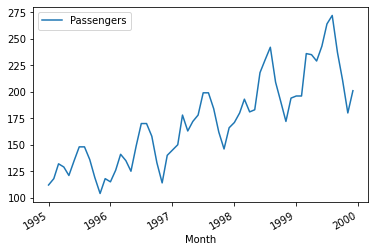

In [35]:
airlines.plot()

## AUTOCORRELATION


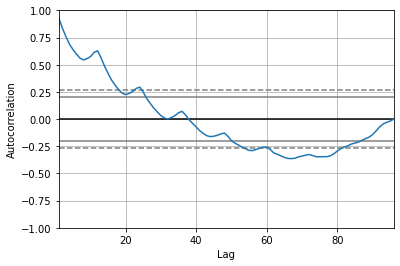

In [36]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(airlines)

## ACF

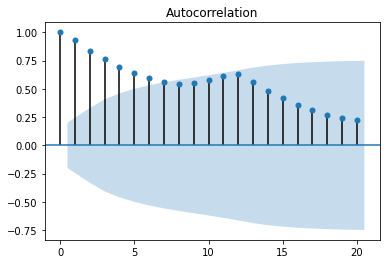

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(airlines)
plt.show()

## PACF

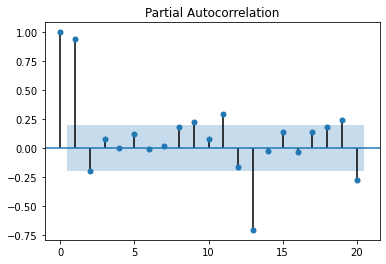

In [38]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(airlines)
plt.show()

In [39]:
train=airlines.head(85)
test=airlines.tail(10)

In [40]:
#ARIMA model
#order(p=1,d=1,q=0 or 1)
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [41]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(airlines, order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=10)
forecast

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/usr/local

96     324.026746
97     315.334761
98     319.525789
99     317.504994
100    318.479364
101    318.009551
102    318.236082
103    318.126855
104    318.179521
105    318.154127
Name: predicted_mean, dtype: float64

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -427.411
Date:                Mon, 19 Jul 2021   AIC                            860.821
Time:                        11:43:30   BIC                            868.483
Sample:                             0   HQIC                           863.917
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4822      0.168     -2.868      0.004      -0.812      -0.153
ma.L1          0.8325      0.102      8.177      0.000       0.633       1.032
sigma2       471.4432     85.326      5.525      0.0

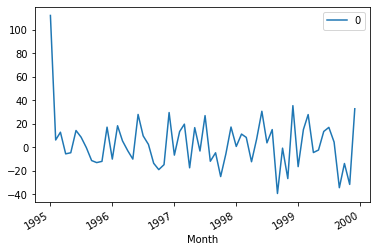

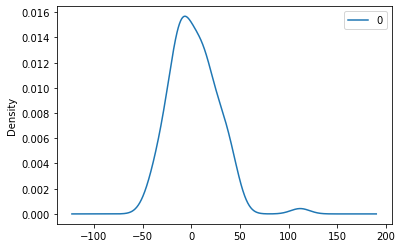

                0
count   96.000000
mean     2.911793
std     24.398190
min    -44.476023
25%    -13.410259
50%     -0.041117
75%     16.866704
max    112.000000


In [42]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals =pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [43]:
#Error on the test data

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, forecast))
rmse

48.60309151017862

In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,forecast)

2362.260504346797